In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\ajeet\Documents\Imrticus\LR Project\tmdb_5000_movies.csv")

C:\Users\ajeet\AppData\Local\Temp\ipykernel_11760\3952939705.py:1: DtypeWarning: Columns (1,2,4,5,6,7,9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\ajeet\Documents\Imrticus\LR Project\tmdb_5000_movies.csv")


In [3]:
df

,budget,Genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000.0,Action,http://www.avatarmovie.com/,19995.0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",United States of America,10-12-2009,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0
1,300000000.0,Adventure,http://disney.go.com/disneypictures/pirates/,285.0,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",United States of America,19-05-2007,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0
2,245000000.0,Action,http://www.sonypictures.com/movies/spectre/,206647.0,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",United Kingdom,26-10-2015,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466.0
3,250000000.0,Action,http://www.thedarkknightrises.com/,49026.0,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",United States of America,16-07-2012,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106.0
4,260000000.0,Action,http://movies.disney.com/john-carter,49529.0,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",United States of America,07-03-2012,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(1048575, 20)

In [5]:
df.columns

Index(['budget', 'Genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [6]:
df.drop(columns={'homepage', 'id',
                'keywords', 'original_language','overview','production_companies','spoken_languages','tagline'}, inplace = True)

In [7]:
df

,budget,Genres,original_title,popularity,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count
0,237000000.0,Action,Avatar,150.437577,United States of America,10-12-2009,2.787965e+09,162.0,Released,Avatar,7.2,11800.0
1,300000000.0,Adventure,Pirates of the Caribbean: At World's End,139.082615,United States of America,19-05-2007,9.610000e+08,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500.0
2,245000000.0,Action,Spectre,107.376788,United Kingdom,26-10-2015,8.806746e+08,148.0,Released,Spectre,6.3,4466.0
3,250000000.0,Action,The Dark Knight Rises,112.312950,United States of America,16-07-2012,1.084939e+09,165.0,Released,The Dark Knight Rises,7.6,9106.0
4,260000000.0,Action,John Carter,43.926995,United States of America,07-03-2012,2.841391e+08,132.0,Released,John Carter,6.1,2124.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.columns 

Index(['budget', 'Genres', 'original_title', 'popularity',
       'production_countries', 'release_date', 'revenue', 'runtime', 'status',
       'title', 'vote_average', 'vote_count'],
      dtype='object')

In [9]:
df.drop(columns= { 'status','original_title','release_date','title'}, inplace = True )

In [10]:
df

,budget,Genres,popularity,production_countries,revenue,runtime,vote_average,vote_count
0,237000000.0,Action,150.437577,United States of America,2.787965e+09,162.0,7.2,11800.0
1,300000000.0,Adventure,139.082615,United States of America,9.610000e+08,169.0,6.9,4500.0
2,245000000.0,Action,107.376788,United Kingdom,8.806746e+08,148.0,6.3,4466.0
3,250000000.0,Action,112.312950,United States of America,1.084939e+09,165.0,7.6,9106.0
4,260000000.0,Action,43.926995,United States of America,2.841391e+08,132.0,6.1,2124.0
...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.head()

,budget,Genres,popularity,production_countries,revenue,runtime,vote_average,vote_count
0,237000000.0,Action,150.437577,United States of America,2.787965e+09,162.0,7.2,11800.0
1,300000000.0,Adventure,139.082615,United States of America,9.610000e+08,169.0,6.9,4500.0
2,245000000.0,Action,107.376788,United Kingdom,8.806746e+08,148.0,6.3,4466.0
3,250000000.0,Action,112.312950,United States of America,1.084939e+09,165.0,7.6,9106.0
4,260000000.0,Action,43.926995,United States of America,2.841391e+08,132.0,6.1,2124.0


In [12]:
pd.isnull(df).sum()

budget                  1043772
Genres                  1043800
popularity              1043772
production_countries    1043946
revenue                 1043772
runtime                 1043774
vote_average            1043772
vote_count              1043772
dtype: int64

In [91]:
df.dropna(inplace = True) ## dropping null values and saving them

In [14]:
df.shape

(4620, 8)

In [15]:
df.info

<bound method DataFrame.info of            budget           Genres  popularity      production_countries  \
0     237000000.0           Action  150.437577  United States of America   
1     300000000.0        Adventure  139.082615  United States of America   
2     245000000.0           Action  107.376788            United Kingdom   
3     250000000.0           Action  112.312950  United States of America   
4     260000000.0           Action   43.926995  United States of America   
...           ...              ...         ...                       ...   
4795          0.0            Drama    0.918116  United States of America   
4796       7000.0  Science Fiction   23.307949  United States of America   
4798     220000.0           Action   14.269792                    Mexico   
4800          0.0           Comedy    1.444476  United States of America   
4802          0.0      Documentary    1.929883  United States of America   

           revenue  runtime  vote_average  vote_count  

In [ ]:
## Taking Production_countries for analysis

In [16]:
df.production_countries  

0       United States of America
1       United States of America
2                 United Kingdom
3       United States of America
4       United States of America
                  ...           
4795    United States of America
4796    United States of America
4798                      Mexico
4800    United States of America
4802    United States of America
Name: production_countries, Length: 4620, dtype: object

In [17]:
df.production_countries.unique()


array(['United States of America', 'United Kingdom', 'Jamaica',
       'Czech Republic', 'New Zealand', 'China', 'Canada', 'Germany',
       'Japan', 'France', 'Australia', 'Italy', 'Spain', 'India',
       'Belgium', 'Hong Kong', 'Norway', 'Ireland', 'South Africa',
       'Mexico', 'Malaysia', 'Finland', 'Iceland', 'Denmark',
       'Philippines', 'Russia', 'Bulgaria', 'Switzerland',
       'United Arab Emirates', 'Malta', 'South Korea', 'Brazil', 'Peru',
       'Netherlands', 'Bosnia and Herzegovina', 'Luxembourg', 'Romania',
       'Singapore', 'Aruba', 'Libyan Arab Jamahiriya', 'Hungary',
       'Argentina', 'Panama', 'Austria', 'Greece', 'Sweden', 'Thailand',
       'Fiji', 'Bahamas', 'Turkey', 'Ireland"}]', 'Cyprus', 'Bolivia',
       'Ecuador', 'Poland', 'Israel"}, {"iso_3166_1":', 'Bhutan',
       'Lebanon', 'Kyrgyz Republic', 'Indonesia', 'Guyana', 'Pakistan',
       'Guadaloupe', 'Iran', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Kenya'], dtype=object)

In [18]:
countries = df.production_countries.unique()
len(countries)
countries [0:20] #

array(['United States of America', 'United Kingdom', 'Jamaica',
       'Czech Republic', 'New Zealand', 'China', 'Canada', 'Germany',
       'Japan', 'France', 'Australia', 'Italy', 'Spain', 'India',
       'Belgium', 'Hong Kong', 'Norway', 'Ireland', 'South Africa',
       'Mexico'], dtype=object)

In [19]:
len(countries) 

68

In [20]:
countries_by_movie_number = df.production_countries.value_counts()
countries_by_movie_number

production_countries
United States of America    3098
United Kingdom               373
Canada                       220
Germany                      200
France                       174
                            ... 
Peru                           1
Malta                          1
Philippines                    1
Jamaica                        1
Kenya                          1
Name: count, Length: 68, dtype: int64

In [92]:
countries_by_movie_number[0:20] ## since different no of countries is 68 we are taking top 20 for analysis


production_countries
United States of America    3098
United Kingdom               373
Canada                       220
Germany                      200
France                       174
Australia                     87
India                         41
China                         40
Spain                         34
Japan                         34
Italy                         26
Mexico                        23
Hong Kong                     22
New Zealand                   22
Czech Republic                18
Ireland                       18
Belgium                       17
Denmark                       14
South Korea                   13
Brazil                        13
Name: count, dtype: int64

<Axes: ylabel='production_countries'>

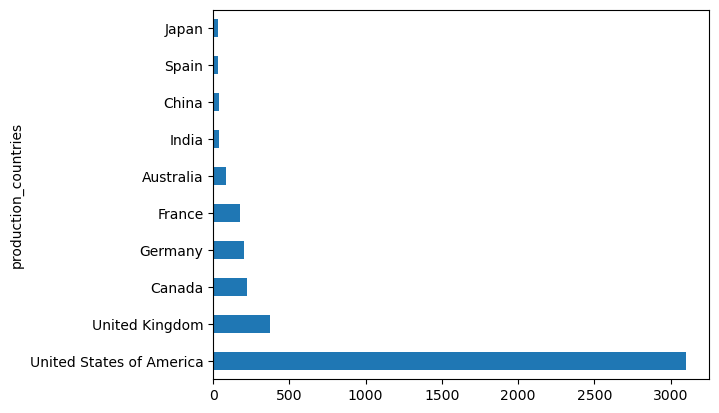

In [22]:
countries_by_movie_number[0:10].plot(kind='barh') ## since number of countries is 68 we are using the first top 20.

In [23]:
## from above plot we cam see that the USA is the first country with highest number of movies followed by UK and Canada

In [24]:
import seaborn as sns
sns.set_style = ("darkgrid")

C:\Users\ajeet\AppData\Local\Temp\ipykernel_11760\2316958049.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(countries_by_movie_number)


<Axes: xlabel='count', ylabel='Density'>

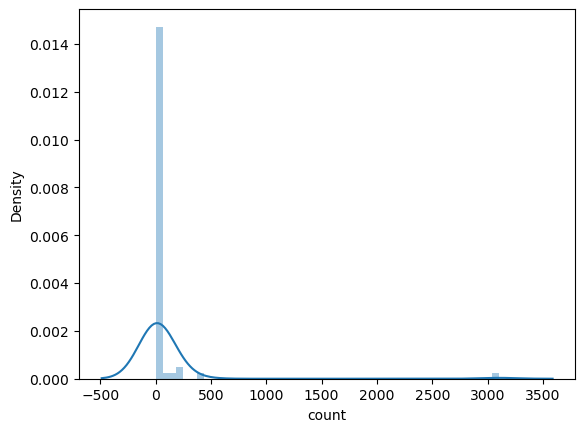

In [25]:
sns.distplot(countries_by_movie_number)

In [114]:
# from above distplot we can see that most of the countries have the movies between 0-300 that gose uptil 3000 that is of usa in number

In [27]:
df.Genres ## taking column Genres for analysis

0                Action
1             Adventure
2                Action
3                Action
4                Action
             ...       
4795              Drama
4796    Science Fiction
4798             Action
4800             Comedy
4802        Documentary
Name: Genres, Length: 4620, dtype: object

In [28]:
df.Genres.unique()

array(['Action', 'Adventure', 'Fantasy', 'Animation', 'Science Fiction',
       'Drama', 'Thriller', 'Family', 'Comedy', 'History', 'War',
       'Western', 'Romance\n', 'Crime\n', ' Mystry', 'Horror',
       'Documentary', 'Music', 'TV Movie', 'Foreign'], dtype=object)

In [29]:
len(df.Genres.unique())

20

In [30]:
genres_count = df.Genres.value_counts()
genres_count

Genres
Drama              1153
Comedy             1008
Action              741
Adventure           337
Horror              285
Crime\n             193
Thriller            189
Animation           121
Fantasy             117
Romance\n           103
Science Fiction      94
Documentary          70
Family               55
 Mystry              40
Music                34
Western              27
History              25
War                  23
TV Movie              4
Foreign               1
Name: count, dtype: int64

<Axes: ylabel='Genres'>

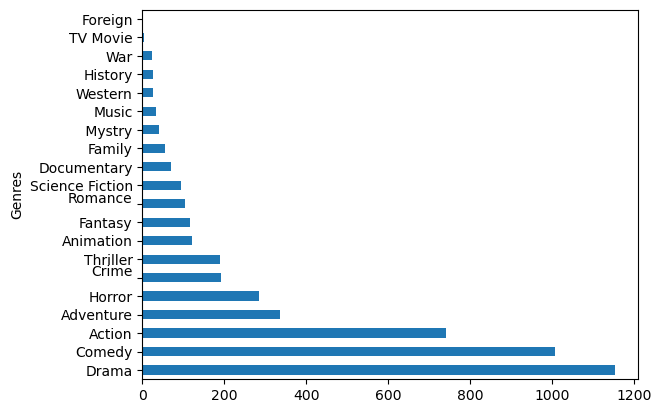

In [31]:
genres_count.plot(kind = 'barh')

In [32]:
# from above graph we can see that most of the movies that have been made they are from Drama genre followed by
#Comedy Action and adventure 

In [33]:
df.head()

,budget,Genres,popularity,production_countries,revenue,runtime,vote_average,vote_count
0,237000000.0,Action,150.437577,United States of America,2.787965e+09,162.0,7.2,11800.0
1,300000000.0,Adventure,139.082615,United States of America,9.610000e+08,169.0,6.9,4500.0
2,245000000.0,Action,107.376788,United Kingdom,8.806746e+08,148.0,6.3,4466.0
3,250000000.0,Action,112.312950,United States of America,1.084939e+09,165.0,7.6,9106.0
4,260000000.0,Action,43.926995,United States of America,2.841391e+08,132.0,6.1,2124.0


In [88]:
column_to_divide = 'budget'

divisor = 1000000 
df[column_to_divide] = df[column_to_divide] / divisor

df[column_to_divide] = df[column_to_divide].round(2)

In [89]:
#here we have converted all the values of budget and revenue into million

In [35]:
df.popularity = df['popularity'].round(2)

In [36]:
revenue_divide = 'revenue'

df[revenue_divide] = df[revenue_divide]/divisor

df[revenue_divide] = df[revenue_divide].round(2)

In [37]:
df.head()

,budget,Genres,popularity,production_countries,revenue,runtime,vote_average,vote_count
0,237.0,Action,150.44,United States of America,2787.97,162.0,7.2,11800.0
1,300.0,Adventure,139.08,United States of America,961.00,169.0,6.9,4500.0
2,245.0,Action,107.38,United Kingdom,880.67,148.0,6.3,4466.0
3,250.0,Action,112.31,United States of America,1084.94,165.0,7.6,9106.0
4,260.0,Action,43.93,United States of America,284.14,132.0,6.1,2124.0


In [38]:
df.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000,4620.000000
mean,30.133643,22.304139,85.494677,107.741126,6.151472,717.201948
std,41.116481,32.171436,165.221832,21.022459,1.074231,1251.187116
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.500000,5.420000,0.000000,94.000000,5.600000,66.000000
50%,15.000000,13.935000,21.965000,104.000000,6.200000,257.000000
75%,40.000000,29.212500,97.215000,118.000000,6.800000,779.000000
max,380.000000,875.580000,2787.970000,338.000000,10.000000,13752.000000


<Axes: xlabel='budget', ylabel='revenue'>

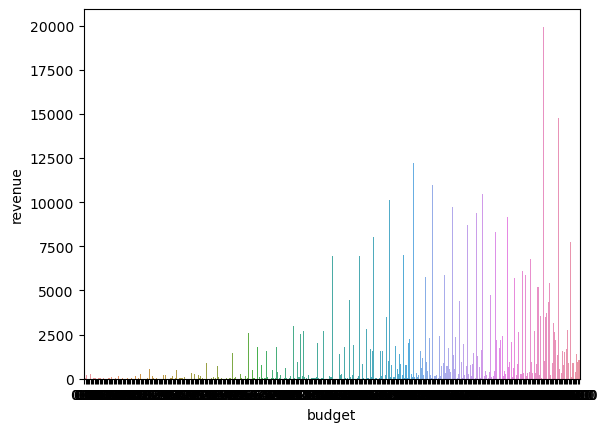

In [118]:
Revenue = df.groupby(['budget'], as_index=False)['revenue'].sum().sort_values(by='revenue', ascending=False)

sns.barplot(x = 'budget',y= 'revenue' ,data = sales_yrs)

<Axes: xlabel='budget', ylabel='revenue'>

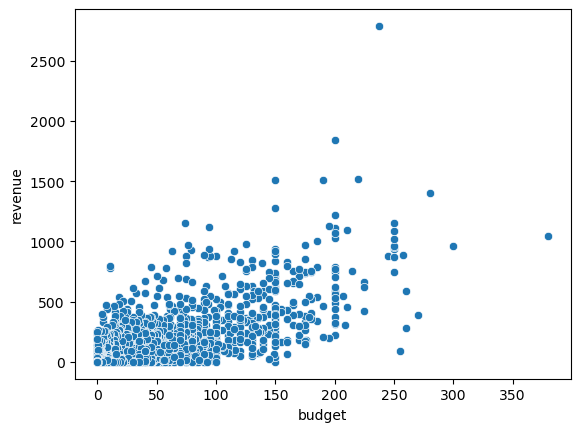

In [40]:
sns.scatterplot(x='budget', y='revenue', data=df)

In [41]:
## from above plot we can see the comparison of budget with revenue

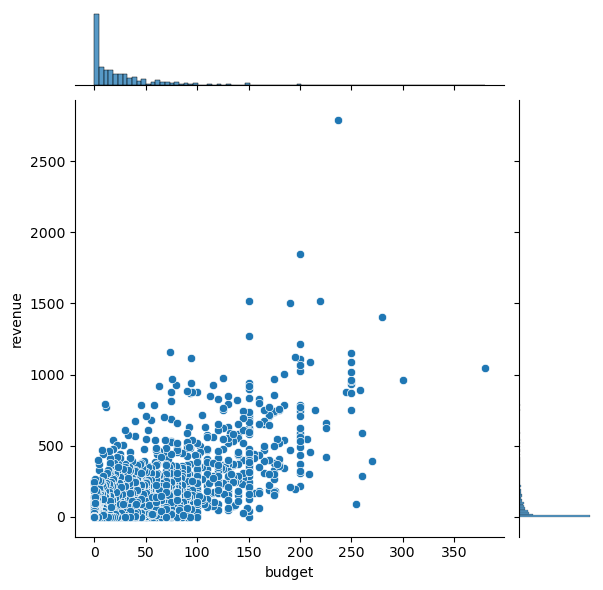

In [42]:
sns.jointplot (x = 'budget', y = 'revenue', data=df)

In [93]:
## revenue and budget has been showen using Jointplot

<Axes: xlabel='revenue'>

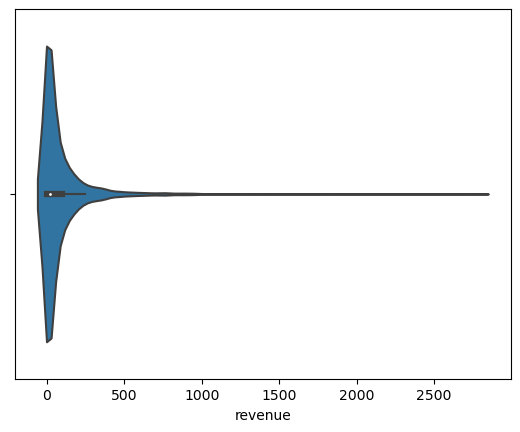

In [43]:
sns.violinplot(x = 'revenue' , data = df)

In [90]:
#revenue is showed in violinplot 


<Axes: xlabel='runtime'>

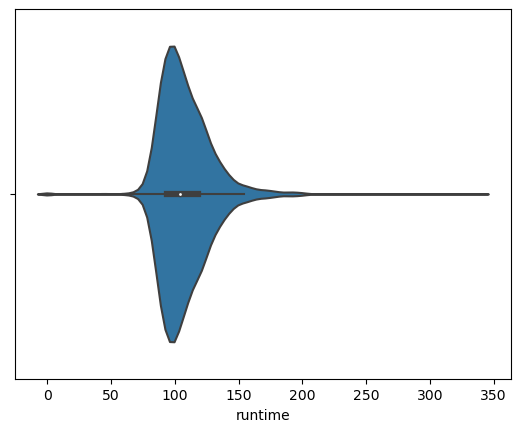

In [44]:
sns.violinplot(x = 'runtime' , data = df)

In [45]:
# Movie Runtime we can see highest number of movies fall between 90 to 120 minutes aproxx 

<Axes: xlabel='runtime'>

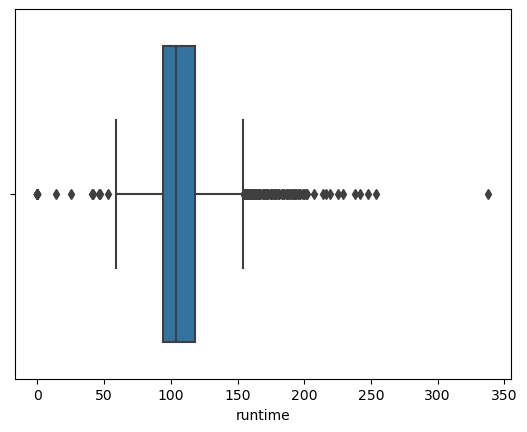

In [46]:
sns.boxplot(x = 'runtime', data= df)

In [47]:
df.head()

,budget,Genres,popularity,production_countries,revenue,runtime,vote_average,vote_count
0,237.0,Action,150.44,United States of America,2787.97,162.0,7.2,11800.0
1,300.0,Adventure,139.08,United States of America,961.00,169.0,6.9,4500.0
2,245.0,Action,107.38,United Kingdom,880.67,148.0,6.3,4466.0
3,250.0,Action,112.31,United States of America,1084.94,165.0,7.6,9106.0
4,260.0,Action,43.93,United States of America,284.14,132.0,6.1,2124.0


<Axes: xlabel='runtime', ylabel='revenue'>

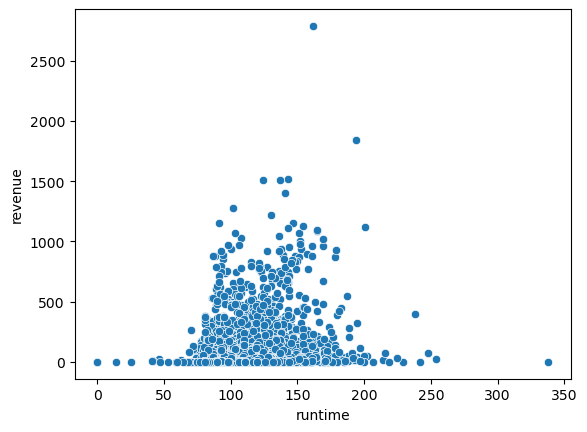

In [48]:
sns.scatterplot(x='runtime', y='revenue', data=df)

In [49]:
# there is no direct relation between runtime and revenue however if a movie is between 90 -200 minutes it increases chancesof getting a good revenue out of it 

# Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [51]:
df

,budget,Genres,popularity,production_countries,revenue,runtime,vote_average,vote_count
0,237.00,Action,150.44,United States of America,2787.97,162.0,7.2,11800.0
1,300.00,Adventure,139.08,United States of America,961.00,169.0,6.9,4500.0
2,245.00,Action,107.38,United Kingdom,880.67,148.0,6.3,4466.0
3,250.00,Action,112.31,United States of America,1084.94,165.0,7.6,9106.0
4,260.00,Action,43.93,United States of America,284.14,132.0,6.1,2124.0
...,...,...,...,...,...,...,...,...
4795,0.00,Drama,0.92,United States of America,0.00,98.0,6.0,1.0
4796,0.01,Science Fiction,23.31,United States of America,0.42,77.0,6.9,658.0
4798,0.22,Action,14.27,Mexico,2.04,81.0,6.6,238.0
4800,0.00,Comedy,1.44,United States of America,0.00,120.0,7.0,6.0


In [52]:
df.drop(columns={'vote_count'},inplace = True)

In [53]:
df

,budget,Genres,popularity,production_countries,revenue,runtime,vote_average
0,237.00,Action,150.44,United States of America,2787.97,162.0,7.2
1,300.00,Adventure,139.08,United States of America,961.00,169.0,6.9
2,245.00,Action,107.38,United Kingdom,880.67,148.0,6.3
3,250.00,Action,112.31,United States of America,1084.94,165.0,7.6
4,260.00,Action,43.93,United States of America,284.14,132.0,6.1
...,...,...,...,...,...,...,...
4795,0.00,Drama,0.92,United States of America,0.00,98.0,6.0
4796,0.01,Science Fiction,23.31,United States of America,0.42,77.0,6.9
4798,0.22,Action,14.27,Mexico,2.04,81.0,6.6
4800,0.00,Comedy,1.44,United States of America,0.00,120.0,7.0


In [54]:
cat_cols = ['Genres', 'production_countries']
encoder = OneHotEncoder (drop = 'first', sparse = False)
encoded_cols = pd.DataFrame(encoder.fit_transform(df[cat_cols]),columns = encoder.get_feature_names_out(cat_cols))

C:\Users\ajeet\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [55]:
num_cols = ['budget', 'popularity', 'runtime', 'vote_average']
scale = StandardScaler()
scaled_cols = pd.DataFrame(scale.fit_transform(df[num_cols]),
                          columns = num_cols)

In [56]:
x = pd.concat([encoded_cols,scaled_cols], axis = 1)
y = df['revenue']

In [57]:
x_test,x_train,y_test,y_train = train_test_split (x,y , train_size=0.8, random_state=42)

In [58]:
model = LinearRegression()

In [59]:
model.fit(x_train,y_train)

LinearRegression()

In [60]:
y_pred = model.predict(x_test)


In [61]:
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [62]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 57.0655901122182
MSE: 10926.869210632478
RMSE: 104.53166606647231
R2 Score: 0.6047693974078152


# Lasso Regression


In [63]:
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression

In [64]:
X , y = make_regression (n_samples = 100, n_features=10, noise=0.1, random_state=42)

In [65]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [66]:
lasso = Lasso(alpha=0.1)

In [67]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [68]:
prediction = lasso.predict(X_test)

In [70]:
mse = mean_squared_error(y_test, prediction)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.18237823772608577


# Ridge Regression 

In [71]:
from sklearn.linear_model import Ridge 
from sklearn.datasets import make_regression

In [72]:
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

In [73]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)

ridge.fit(X_train, y_train)


Ridge()

In [74]:

predictions = ridge.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 11.844580603662983


# Elastic net method

In [94]:
from sklearn.linear_model import ElasticNet

In [76]:
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)

elastic_net.fit(X_train, y_train)

ElasticNet()

In [77]:
predictions = elastic_net.predict(X_test)


mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7785.886176938015


# Tuning

In [78]:
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV

In [79]:
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
ridge = Ridge()
param_grid = {'alpha': [0.1, 1.0, 10.0,50], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [96]:
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

In [97]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 50],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             scoring='neg_mean_squared_error')

In [98]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'alpha': 0.1, 'solver': 'sparse_cg'}


In [99]:
best_model = grid_search.best_estimator_

In [100]:
predictions = best_model.predict(X_test)

In [101]:
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.14744635994909128


In [116]:
r2 = r2_score(y_test, predictions)
print(f"R^2 Score: {r2}")

R^2 Score: 0.9999975329050182
